<a href="https://colab.research.google.com/github/Tsutomu-dayoo/DNN_lerning/blob/master/GaussianOptimaizationTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in sqrt


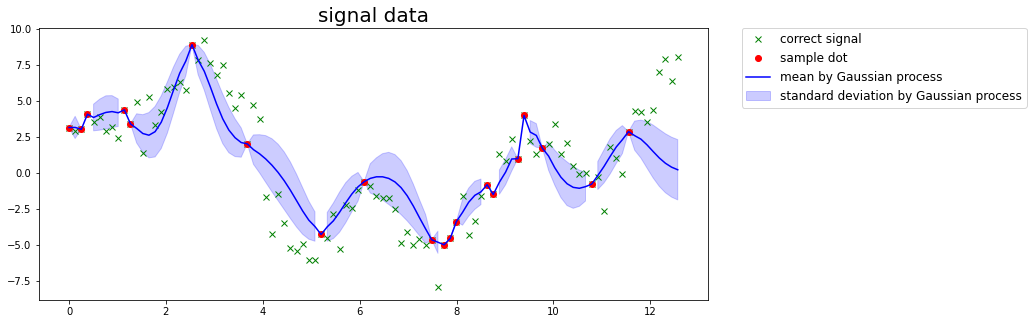

In [37]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
data_x = np.linspace(0, 4*np.pi, n)
data_y = 2*np.sin(data_x) + 3*np.cos(2*data_x) + 5*np.sin(2/3*data_x) + np.random.randn(len(data_x)) 
#ノイズ入りの信号,np.random.randn->平均０、標準偏差１の正規分布に従う乱数

def kernel(x, x_prime, theta1, theta2, theta3):
  if x == x_prime:
    delta = 1
  else:
    delta = 0

  return theta1 * np.exp(-1 * (x - x_prime)**2 / theta2) + (theta3 * delta) 
#入力x,x_primeの距離が大きくなるほど、ガウス分布のように指数的に減衰する

missing_value_rate = 0.2
#rondom.choice：配列やリストからランダムに要素を取る。
sample_index = np.sort(np.random.choice(np.arange(n), int(n*missing_value_rate), replace=False))#100サンプルから20サンプルを抽出

#Test data
x_train = np.copy(data_x[sample_index])
y_train = np.copy(data_y[sample_index])

x_test = np.copy(data_x) #全データ

mu = [] #平均
var = [] #分散

theta_1 = 1.0
theta_2 = 0.4
theta_3 = 0.1

train_length = len(x_train) #訓練データの要素数
#訓練データのデータ同士のカーネル行列の下地
K = np.zeros((train_length, train_length)) #(行,列)

for x in range(train_length):
  for x_prime in range(train_length):
    K[x, x_prime] = kernel(x_train[x], x_train[x_prime], theta_1, theta_2, theta_3)
    #各訓練データ同士でカーネル行列を作成

yy = np.dot(np.linalg.inv(K), y_train) #np.linalg.inv：逆行列

test_length = len(x_test)
for xtest in range(test_length):
  #テストデータと訓練データ同士のカーネル行列
  k = np.zeros((train_length, ))
  for x in range(train_length):
    k[x] = kernel(x_train[x], x_test[xtest], theta_1, theta_2, theta_3)
  #テストデータ同士のカーネル行列
  s = kernel(x_test[xtest], x_test[xtest], theta_1, theta_2, theta_3)

  #内積の計算、平均値の配列に追加
  mu.append(np.dot(k, yy))
  #先にk * K^-1の部分を内積で計算
  kK_ = np.dot(k, np.linalg.inv(K))
  #後半部分との内積をドットで計算、分散の配列に追加
  var.append(s - np.dot(kK_, k.T))

fig = plt.figure(figsize = (12, 5))
plt.title('signal data', fontsize=20)
plt.plot(data_x, data_y, linestyle='None', marker='x',color='green', label='correct signal')
plt.plot(data_x[sample_index], data_y[sample_index], linestyle='None', marker='o',color='red', label='sample dot')

std = np.sqrt(var)

plt.plot(x_test, mu, color='blue', label='mean by Gaussian process')
plt.fill_between(x_test, mu + 2*std, mu - 2*std, alpha=0.2, color='blue', label= 'standard deviation by Gaussian process')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

plt.show()

In [28]:
pip install GPy

     |████████████████████████████████| 1.0MB 14.9MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp36-cp36m-linux_x86_64.whl size=2633948 sha256=f2c3562821498354b62596d30beb0762d88e4984eac264c66b03605dd4cfa7b0
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp36-none-any.whl size=102552 sha256=4dc48d273e2c036e35a70c6af0af1d15b8a27c49e7cdc6380783f4aa13e46c9a
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPy paramz


In [5]:
pip install GPyOpt

     |████████████████████████████████| 61kB 8.6MB/s 
  Created wheel for GPyOpt: filename=GPyOpt-1.2.6-cp36-none-any.whl size=83623 sha256=073ed1cb242b9787d5e786edff78745af117eefda0ad6940f5b10b458ba4ca5d
  Stored in directory: /root/.cache/pip/wheels/b2/00/69/cfa967a125cf25e66f644be6193ad6f0edf231147879ad714f
Successfully built GPyOpt


[7, 5, 9, 4]


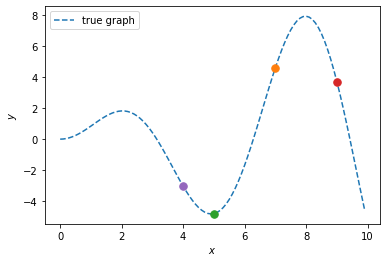

'\nmyProblem = GPyOpt.methods.BayesianOptimization(rosenbrock,                   #最適化したい関数\n                                                domain=bounds,                #変数の範囲\n                                                acquisition_type=\'EI\',        #獲得関数の種類\n                                                exact_feval = True,           #最終出力を計算するか\n                                                initial_design_type ="latin", #初期実験の方法(ラテン超方格実験)\n                                                initial_design_numdata=20 )   #初期実験の実験数\nmax_iter = 30\nmyProblem.run_optimization(max_iter) \n'

In [10]:
import numpy as np  # NumPy を読み込む
import matplotlib.pyplot as plt  # Matplotlib を読み込む
import random
import GPy
import GPyOpt

def y(x):
  return np.sin(x) * x # 正弦関数の式を記述

def rosenbrock(X):
  return (1-X[:,0])**2 + 100*(X[:,1]-X[:,0]**2)**2

bounds =[{'name': 'x', 'type': 'continuous', 'domain': (min,max)}]
min = 0
max = 10
x = np.arange(min, max, 0.1)  # x座標を-10 から 10 まで 0.1 きざみで取得
plt.plot(x, y(x),linestyle="--",label='true graph')  # x, y をプロット
l=random.sample(range(min,max,1), k=4)
print(l)
for i in range(len(l)):
  plt.plot(l[i],y(l[i]),marker='.',markersize=15)#plt.plot(x座標, y座標,marker = '点の形',color = '点の色',markersize = 点のサイズ)
plt.xlabel("$x$") 
plt.ylabel("$y$") 
plt.legend()
plt.show()  # グラフを表示
"""
myProblem = GPyOpt.methods.BayesianOptimization(rosenbrock,                   #最適化したい関数
                                                domain=bounds,                #変数の範囲
                                                acquisition_type='EI',        #獲得関数の種類
                                                exact_feval = True,           #最終出力を計算するか
                                                initial_design_type ="latin", #初期実験の方法(ラテン超方格実験)
                                                initial_design_numdata=20 )   #初期実験の実験数
max_iter = 30
myProblem.run_optimization(max_iter) 
"""

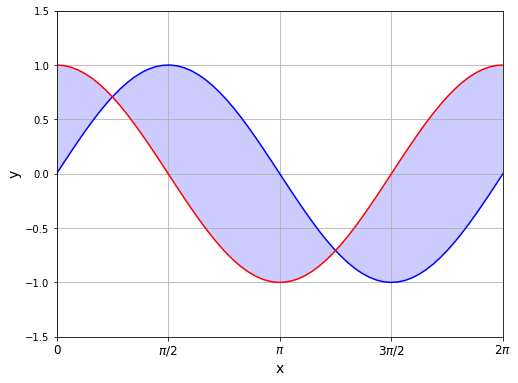

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# 円周率を定義
pi = np.pi

# プロットするデータを用意
x = np.arange(0, 3*pi, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

# FigureとAxesの設定
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.grid()
ax.set_xlabel("x", fontsize = 14)
ax.set_ylabel("y", fontsize = 14)
ax.set_xlim(0.0, 2 * pi)
ax.set_ylim(-1.5, 1.5)
ax.set_xticks([0, pi/2, pi, 3*pi/2, 2*pi])
ax.set_xticklabels(["0", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"],
                   fontsize = 12)

# Axesにグラフをプロット
ax.plot(x, y1, color = "blue")
ax.plot(x, y2, color = "red")

# y1とy1の間をライム色で塗り潰す
ax.fill_between(x, y1, y2, facecolor='blue', alpha=0.2)

plt.show()